In [21]:
import pandas as pd
import seaborn as sns   
import time as tm
import numpy as np
import matplotlib.pyplot as plt
import time
import re
from math import pi
import networkx as nx

In [22]:
file2= "C:\\Users\\Usuario\\Documents\\CODIGO\\EVENT_SALUD\\RECURSOS_salud_csv.csv"
recursos_salud = pd.read_csv(file2, sep=";")

#Eliminando datos no deseados
recursos_salud = recursos_salud.dropna(subset=['CA_CONSULTORIOS'])

print(recursos_salud.isnull().sum())

# Diccionario de regiones clasificadas por zonas
zonas_geograficas = {
    "Costa": [
        "TUMBES", "PIURA", "LAMBAYEQUE", "LA LIBERTAD", 
        "ANCASH", "LIMA", "CALLAO", "ICA", "AREQUIPA", "MOQUEGUA", "TACNA"
    ],
    "Sierra": [
        "CAJAMARCA", "AMAZONAS", "HUANUCO", "PASCO", "JUNIN", 
        "HUANCAVELICA", "APURIMAC", "CUSCO", "AYACUCHO", "PUNO", "AREQUIPA"
    ],
    "Selva": [
        "AMAZONAS", "LORETO", "UCAYALI", "SAN MARTIN", 
        "MADRE DE DIOS", "HUÁNUCO", "CUSCO"
    ]
}

# Agregar la columna 'Zona' al dataset según el departamento
def asignar_zona(departamento):
    for zona, departamentos in zonas_geograficas.items():
        if departamento.upper() in departamentos:
            return zona
    return "Otros"

# Aplicar la función al dataset de recursos_salud
recursos_salud["Zona"] = recursos_salud["DEPARTAMENTO"].apply(asignar_zona)

recursos_salud

MES                      0
UBIGEO                   0
DEPARTAMENTO             0
PROVINCIA                0
DISTRITO                 0
SECTOR                   0
CATEGORIA                0
CO_IPRESS                0
RAZON_SOC                0
CA_CONSULTORIOS          0
CA_CONSULTORIOS_FN       0
CA_CAMAS                 0
CA_MEDICOS_TOTAL         0
CA_MEDICOS_SERUM         0
CA_MEDICOS_RESIDENTES    0
CA_ENFERMERAS            0
CA_ODONTOLOGOS           0
CA_PSICOLOGOS            0
CA_NUTRICIONISTAS        0
CA_TECNOLOGOS_MEDICOS    0
CA_OBSTETRICES           0
CA_FARMACEUTICOS         0
CA_AUXILIARES            0
CA_OTROS_PROF            0
CA_AMBULANCIAS           0
dtype: int64


,MES,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,SECTOR,CATEGORIA,CO_IPRESS,RAZON_SOC,CA_CONSULTORIOS,...,CA_ODONTOLOGOS,CA_PSICOLOGOS,CA_NUTRICIONISTAS,CA_TECNOLOGOS_MEDICOS,CA_OBSTETRICES,CA_FARMACEUTICOS,CA_AUXILIARES,CA_OTROS_PROF,CA_AMBULANCIAS,Zona
0,8,40604,AREQUIPA,CONDESUYOS,CHICHAS,GOBIERNO REGIONAL,I-2,1410,PUESTO DE SALUD CHICHAS,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,Costa
1,8,40604,AREQUIPA,CONDESUYOS,CHICHAS,GOBIERNO REGIONAL,I-1,1416,YANQUE,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Costa
2,8,40608,AREQUIPA,CONDESUYOS,YANAQUIHUA,GOBIERNO REGIONAL,I-2,1414,PUESTO DE SALUD ISPACAS,5.0,...,1.0,1.0,1.0,0.0,2.0,0.0,3.0,0.0,1.0,Costa
3,8,40602,AREQUIPA,CONDESUYOS,ANDARAY,GOBIERNO REGIONAL,I-2,1415,PUESTO DE SALUD ANDARAY,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,Costa
4,8,40604,AREQUIPA,CONDESUYOS,CHICHAS,GOBIERNO REGIONAL,I-2,1411,PUESTO DE SALUD YACHANGUILLO,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,Costa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46895,12,160101,LORETO,MAYNAS,IQUITOS,SANIDAD DE LA FUERZA AEREA DEL PERU,I-4,10605,HOSPITAL REGIONAL DEL ORIENTE - FAP,11.0,...,3.0,2.0,1.0,1.0,1.0,2.0,21.0,2.0,0.0,Selva
46896,12,140106,LAMBAYEQUE,CHICLAYO,LA VICTORIA,PRIVADO,II-E,10972,HOSPITAL PRIVADO JUAN PABLO II SAC,9.0,...,0.0,0.0,0.0,8.0,0.0,2.0,27.0,1.0,1.0,Costa
46897,12,220605,SAN MARTIN,MARISCAL CACERES,PAJARILLO,GOBIERNO REGIONAL,I-1,6783,SOLEDAD,3.0,...,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,Selva
46898,12,220605,SAN MARTIN,MARISCAL CACERES,PAJARILLO,GOBIERNO REGIONAL,I-1,6563,COSTA RICA,4.0,...,0.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,1.0,Selva


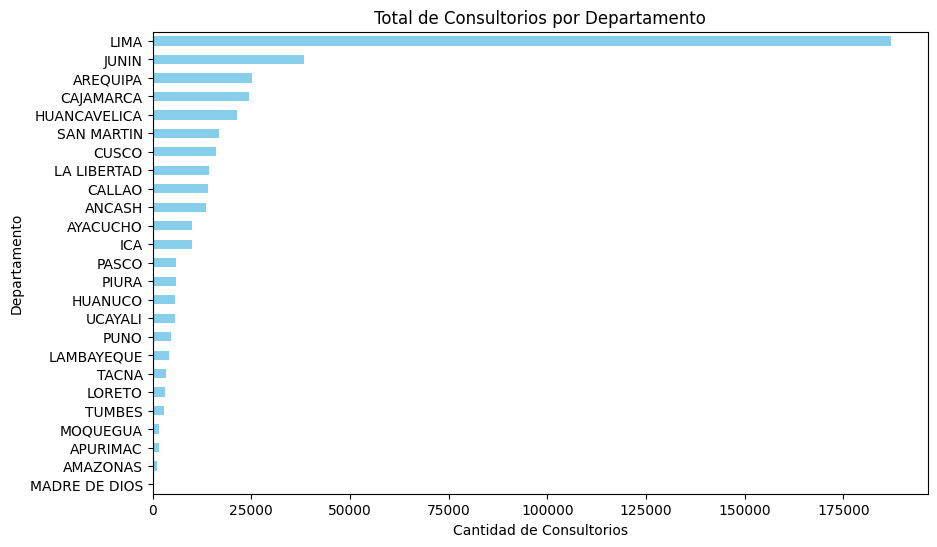

In [23]:
# Total de recursos por departamento
recursos_por_departamento = recursos_salud.groupby("DEPARTAMENTO").sum(numeric_only=True)

# Gráfico de barras para visualizar los recursos
import matplotlib.pyplot as plt
recursos_por_departamento["CA_CONSULTORIOS"].sort_values().plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title("Total de Consultorios por Departamento")
plt.xlabel("Cantidad de Consultorios")
plt.ylabel("Departamento")
plt.show()


     CA_MEDICOS_TOTAL  CA_MEDICOS_SERUM  CA_MEDICOS_RESIDENTES  CA_ENFERMERAS  \
MES                                                                             
1             55420.0            1373.0                 6146.0        53085.0   
2             55036.0            1327.0                 5837.0        52851.0   
3             55326.0            1274.0                 5749.0        52423.0   
4             61934.0            1334.0                 6174.0        53266.0   
5             55838.0            1310.0                 6151.0        53143.0   
6             56050.0            1365.0                 6028.0        53287.0   
7             56174.0            1524.0                 5438.0        53642.0   
8             56212.0            1413.0                 6128.0        53548.0   
9             56582.0            1395.0                 6236.0        54188.0   
10            57352.0            1463.0                 6339.0        54653.0   
11            57364.0       

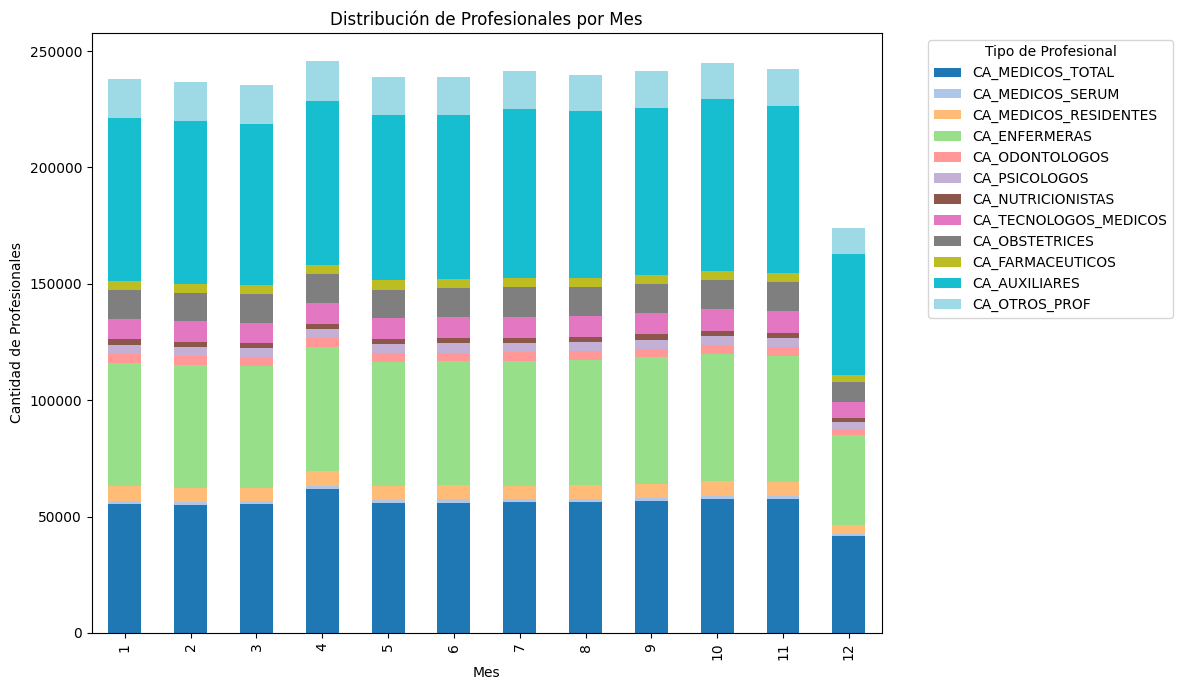

In [24]:
# Agrupar por MES y sumar la cantidad de profesionales
profesionales_por_mes = recursos_salud.groupby("MES")[[
    "CA_MEDICOS_TOTAL", "CA_MEDICOS_SERUM", "CA_MEDICOS_RESIDENTES", "CA_ENFERMERAS", 
    "CA_ODONTOLOGOS", "CA_PSICOLOGOS", "CA_NUTRICIONISTAS", "CA_TECNOLOGOS_MEDICOS",
    "CA_OBSTETRICES", "CA_FARMACEUTICOS", "CA_AUXILIARES", "CA_OTROS_PROF"
]].sum()

# Imprimir la tabla resultante
print(profesionales_por_mes)

# Gráfico de barras apiladas para mostrar la cantidad por tipo de profesional en cada mes
profesionales_por_mes.plot(kind='bar', stacked=True, figsize=(12, 7), cmap="tab20")
plt.title("Distribución de Profesionales por Mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Profesionales")
plt.legend(title="Tipo de Profesional", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Promedio mensual de profesionales:
CA_MEDICOS_TOTAL         55395.583333
CA_MEDICOS_SERUM          1354.833333
CA_MEDICOS_RESIDENTES     5875.083333
CA_ENFERMERAS            52225.666667
CA_ODONTOLOGOS            3689.250000
CA_PSICOLOGOS             3803.250000
CA_NUTRICIONISTAS         2298.916667
CA_TECNOLOGOS_MEDICOS     8763.333333
CA_OBSTETRICES           12152.750000
CA_FARMACEUTICOS          3870.916667
CA_AUXILIARES            69540.083333
CA_OTROS_PROF            15839.083333
dtype: float64


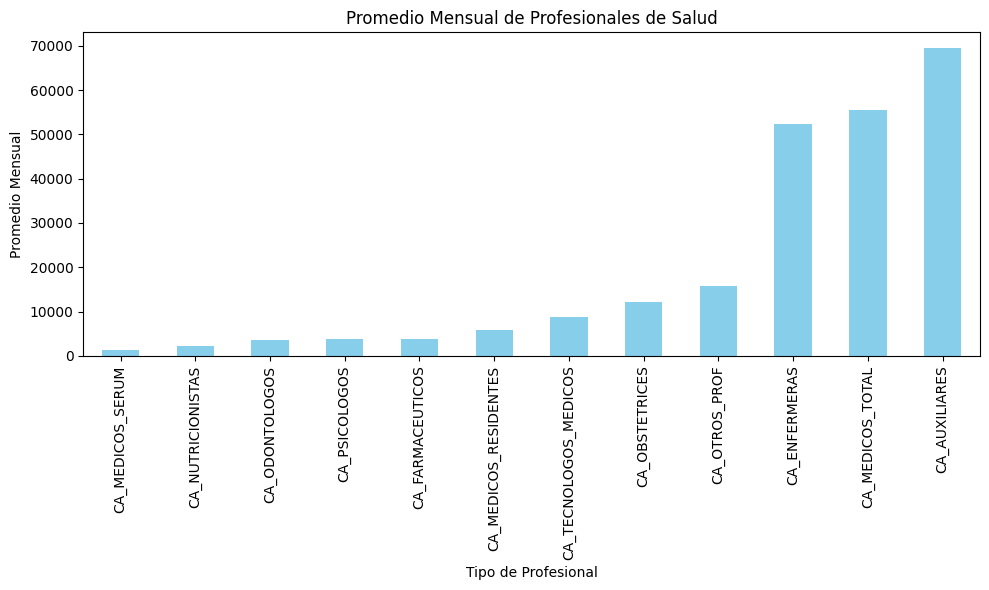

In [36]:
# Calcular el promedio mensual por tipo de profesional
promedio_profesionales = profesionales_por_mes.mean()

# Imprimir los resultados
print("Promedio mensual de profesionales:")
print(promedio_profesionales)

# gráfico de barras
promedio_profesionales.sort_values().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Promedio Mensual de Profesionales de Salud")
plt.xlabel("Tipo de Profesional")
plt.ylabel("Promedio Mensual")
plt.tight_layout()
plt.show()


CATEGORIA
0        30.855520
I-1       0.795679
I-2       0.717401
I-3       0.854440
I-4       0.781823
II-1      0.843657
II-2      0.713230
II-E      0.863589
III-1     0.791192
III-2     0.971979
III-E     0.593479
Name: Relacion_Consultorios, dtype: float64


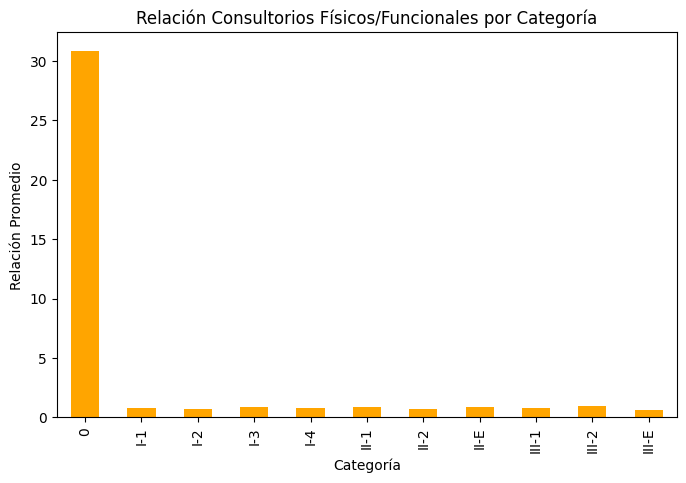

In [26]:
# Relación entre consultorios físicos y funcionales
recursos_salud['Relacion_Consultorios'] = recursos_salud["CA_CONSULTORIOS"] / (recursos_salud["CA_CONSULTORIOS_FN"] + 1)

# Promedio de la relación por categoría
relacion_por_categoria = recursos_salud.groupby("CATEGORIA")["Relacion_Consultorios"].mean()
print(relacion_por_categoria)

# Visualización
relacion_por_categoria.plot(kind='bar', figsize=(8, 5), color='orange')
plt.title("Relación Consultorios Físicos/Funcionales por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Relación Promedio")
plt.show()


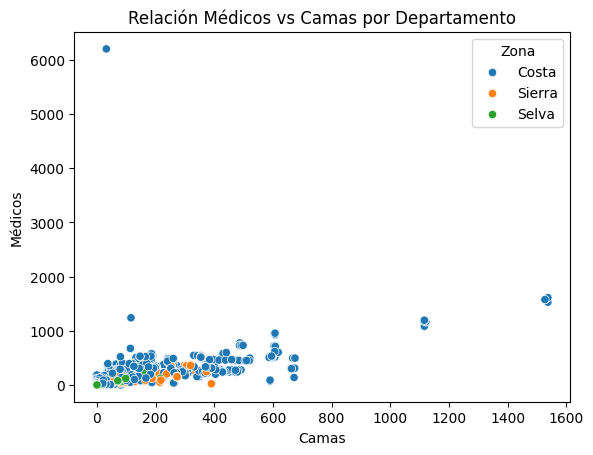

In [27]:
# Relación médicos por camas
recursos_salud["Medicos_por_Cama"] = recursos_salud["CA_MEDICOS_TOTAL"] / (recursos_salud["CA_CAMAS"] + 1)

# Gráfico de dispersión médicos vs camas
import seaborn as sns
sns.scatterplot(data=recursos_salud, x="CA_CAMAS", y="CA_MEDICOS_TOTAL", hue="Zona")
plt.title("Relación Médicos vs Camas por Departamento")
plt.xlabel("Camas")
plt.ylabel("Médicos")
plt.show()


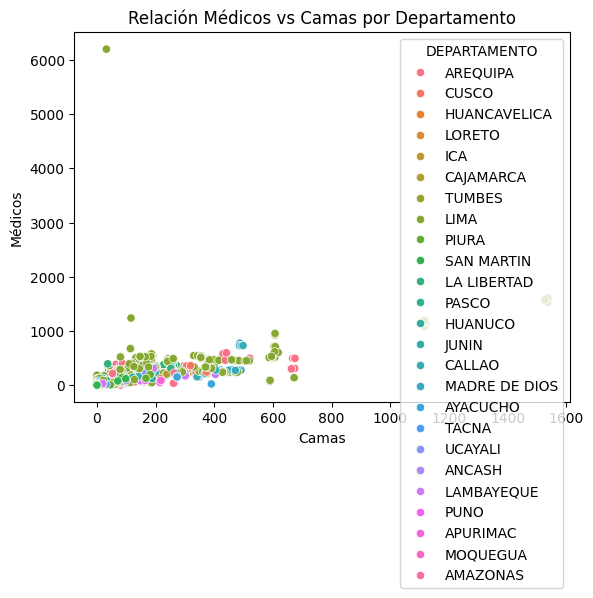

In [28]:
# Relación médicos por camas
recursos_salud["Medicos_por_Cama"] = recursos_salud["CA_MEDICOS_TOTAL"] / (recursos_salud["CA_CAMAS"] + 1)

# Gráfico de dispersión médicos vs camas
import seaborn as sns
sns.scatterplot(data=recursos_salud, x="CA_CAMAS", y="CA_MEDICOS_TOTAL", hue="DEPARTAMENTO")
plt.title("Relación Médicos vs Camas por Departamento")
plt.xlabel("Camas")
plt.ylabel("Médicos")
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_10024\899997924.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recursos_salud_lima["Medicos_por_Cama"] = recursos_salud_lima["CA_MEDICOS_TOTAL"] / (recursos_salud_lima["CA_CAMAS"] + 1)


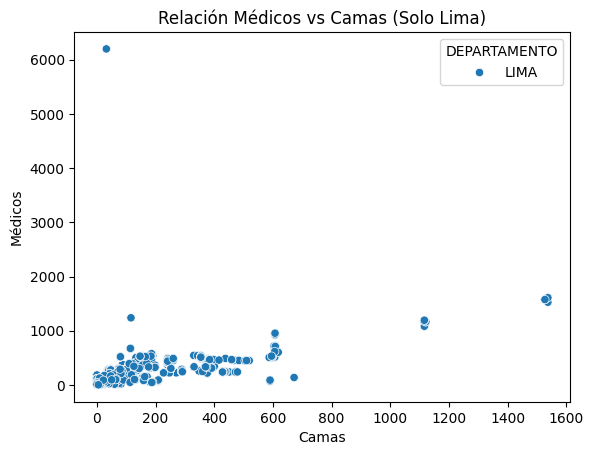

In [29]:
# Filtrar solo el departamento de Lima
recursos_salud_lima = recursos_salud[recursos_salud["DEPARTAMENTO"] == "LIMA"]

# Calcular relación médicos por cama para Lima
recursos_salud_lima["Medicos_por_Cama"] = recursos_salud_lima["CA_MEDICOS_TOTAL"] / (recursos_salud_lima["CA_CAMAS"] + 1)

# Gráfico de dispersión médicos vs camas (solo Lima)
sns.scatterplot(data=recursos_salud_lima, x="CA_CAMAS", y="CA_MEDICOS_TOTAL", hue="DEPARTAMENTO")
plt.title("Relación Médicos vs Camas (Solo Lima)")
plt.xlabel("Camas")
plt.ylabel("Médicos")
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_10024\916994752.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recursos_salud_sin_lima["Medicos_por_Cama"] = recursos_salud_sin_lima["CA_MEDICOS_TOTAL"] / (recursos_salud_sin_lima["CA_CAMAS"] + 1)


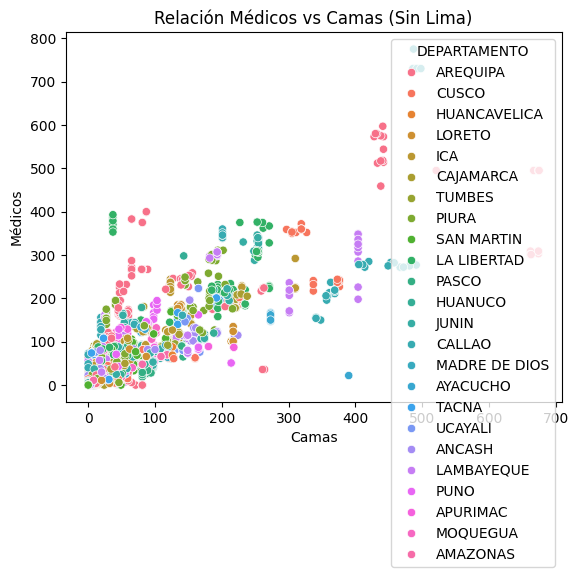

In [30]:
# Filtrar todos los departamentos excepto Lima
recursos_salud_sin_lima = recursos_salud[recursos_salud["DEPARTAMENTO"] != "LIMA"]

# Calcular relación médicos por cama excluyendo Lima
recursos_salud_sin_lima["Medicos_por_Cama"] = recursos_salud_sin_lima["CA_MEDICOS_TOTAL"] / (recursos_salud_sin_lima["CA_CAMAS"] + 1)

# Gráfico de dispersión médicos vs camas (excluyendo Lima)
sns.scatterplot(data=recursos_salud_sin_lima, x="CA_CAMAS", y="CA_MEDICOS_TOTAL", hue="DEPARTAMENTO")
plt.title("Relación Médicos vs Camas (Sin Lima)")
plt.xlabel("Camas")
plt.ylabel("Médicos")
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_10024\92327352.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recursos_salud_sin_lima["Medicos_por_Cama"] = recursos_salud_sin_lima["CA_MEDICOS_TOTAL"] / (recursos_salud_sin_lima["CA_CAMAS"] + 1)


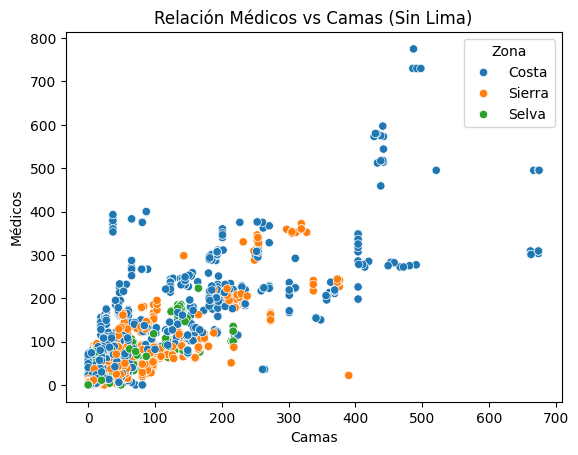

In [31]:
# Filtrar todos los departamentos excepto Lima
recursos_salud_sin_lima = recursos_salud[recursos_salud["DEPARTAMENTO"] != "LIMA"]

# Calcular relación médicos por cama excluyendo Lima
recursos_salud_sin_lima["Medicos_por_Cama"] = recursos_salud_sin_lima["CA_MEDICOS_TOTAL"] / (recursos_salud_sin_lima["CA_CAMAS"] + 1)

# Gráfico de dispersión médicos vs camas (excluyendo Lima)
sns.scatterplot(data=recursos_salud_sin_lima, x="CA_CAMAS", y="CA_MEDICOS_TOTAL", hue="Zona")
plt.title("Relación Médicos vs Camas (Sin Lima)")
plt.xlabel("Camas")
plt.ylabel("Médicos")
plt.show()


***ZONAS CRITICAS***

Filtramos cuantos puestos de salud tienen menos de 2 medicos y 1 cama en el establecimiento de salud

Junin 
Cajamarca
Huancavelica
San Martin 
Cuzco
Pasco
Ancash



In [32]:
# Filtrar IPRESS con menos de 2 médicos y 1 cama
zonas_criticas = recursos_salud[(recursos_salud["CA_MEDICOS_TOTAL"] < 2) & (recursos_salud["CA_CAMAS"] < 1)]

# Total de zonas críticas por departamento
cant_criticas_departamento = zonas_criticas["DEPARTAMENTO"].value_counts()
print(cant_criticas_departamento)


DEPARTAMENTO
JUNIN            5118
CAJAMARCA        4953
HUANCAVELICA     4475
SAN MARTIN       2688
CUSCO            1903
PASCO            1903
ANCASH           1426
AREQUIPA         1187
AYACUCHO         1000
LA LIBERTAD       846
UCAYALI           702
HUANUCO           536
ICA               372
TUMBES            235
LIMA              129
CALLAO            111
PUNO               69
TACNA              50
MOQUEGUA           38
PIURA              22
LORETO              3
APURIMAC            1
MADRE DE DIOS       1
Name: count, dtype: int64


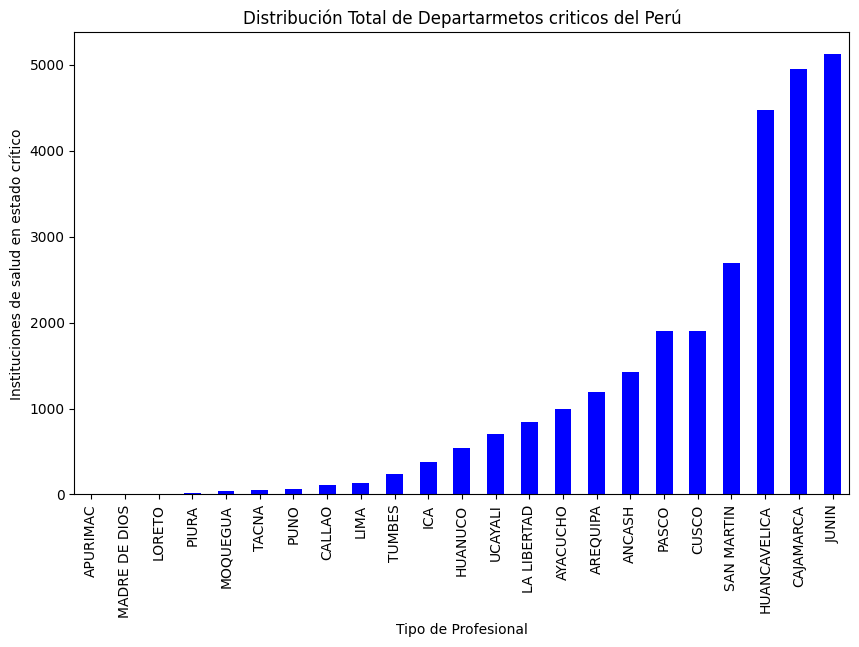

In [33]:
# Gráfico de barras de distribución de profesionales
cant_criticas_departamento.sort_values().plot(kind='bar', figsize=(10, 6), color='blue')
plt.title("Distribución Total de Departarmetos criticos del Perú")
plt.xlabel("Tipo de Profesional")
plt.ylabel("Instituciones de salud en estado crítico")
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10024\2013503217.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cant_criticas_departamento.index, y=cant_criticas_departamento.values, palette="viridis", ax=ax)


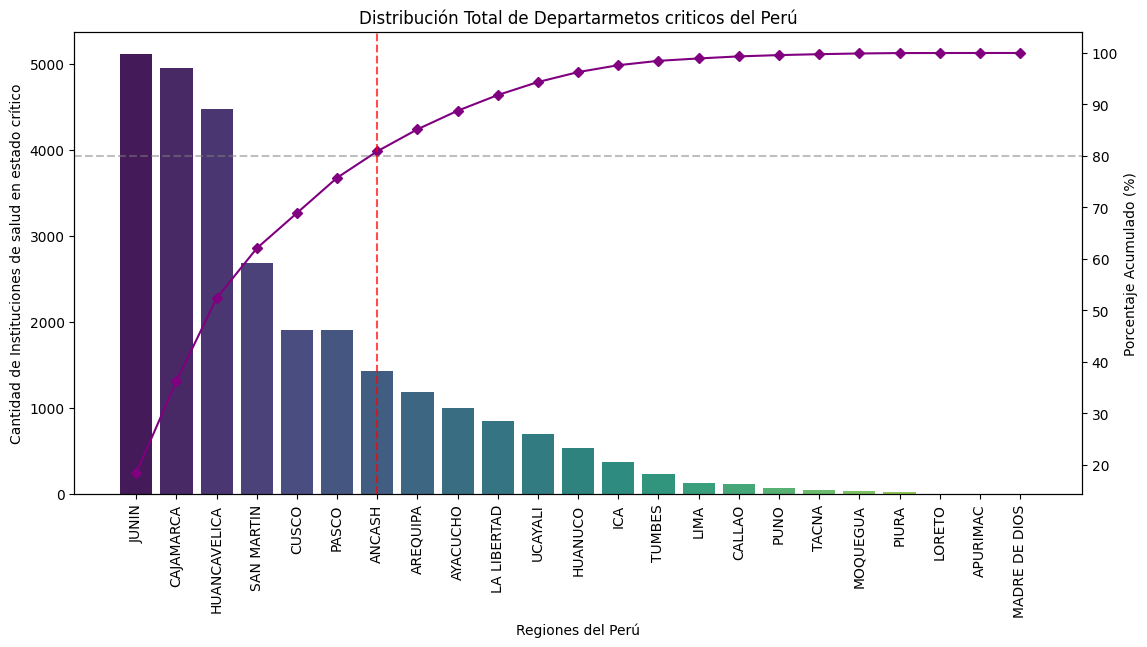

In [34]:
# Gráfico de Pareto
fig, ax = plt.subplots(figsize=(13, 6))

# Gráfico de barras
sns.barplot(x=cant_criticas_departamento.index, y=cant_criticas_departamento.values, palette="viridis", ax=ax)
ax.set_title("Distribución Total de Departarmetos criticos del Perú")
ax.set_xlabel("Regiones del Perú")
ax.set_ylabel("Cantidad de Instituciones de salud en estado crítico")

# Rotación de etiquetas en el eje X
plt.xticks(rotation=90, ha='center')  # Cambia `ha` a 'center' para centrar las etiquetas verticales

# Gráfico de línea para porcentaje acumulado
ax2 = ax.twinx()
accum_percentage = cant_criticas_departamento.cumsum() / cant_criticas_departamento.sum() * 100
ax2.plot(cant_criticas_departamento.index, accum_percentage, color="purple", marker="D", markersize=5, linestyle="-")
ax2.axhline(80, color="gray", linestyle="--", alpha=0.5)
ax2.set_ylabel("Porcentaje Acumulado (%)")

# Determinar el índice donde el porcentaje acumulado cruza el 80%
cross_index = accum_percentage[accum_percentage >= 80].index[0]

# Dibujar una línea vertical en el punto donde cruza el 80%
ax2.axvline(x=cross_index, color="red", linestyle="--", alpha=0.7, label="Corte 80%")

plt.show()

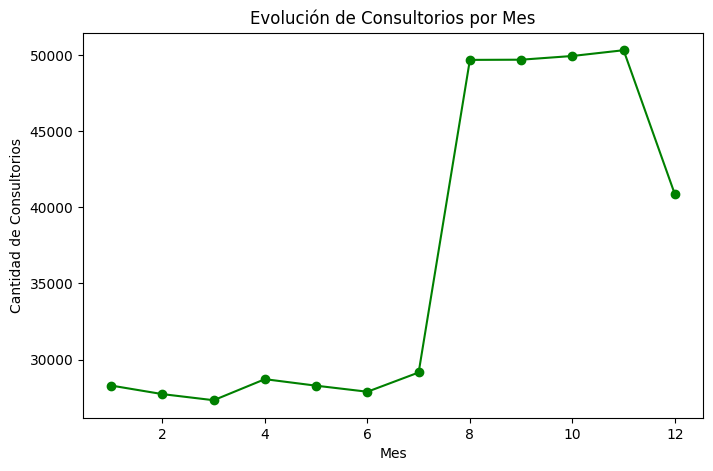

In [35]:
# Sumar recursos por mes
recursos_por_mes = recursos_salud.groupby("MES").sum(numeric_only=True)

# Visualizar la evolución de consultorios por mes
recursos_por_mes["CA_CONSULTORIOS"].plot(kind='line', marker='o', figsize=(8, 5), color='green')
plt.title("Evolución de Consultorios por Mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Consultorios")
plt.show()
